
---
title: Lab 8 - Mason Brehmer
echo: true
format: 
  html: 
    embed-resources: true
    code-fold: true
    toc: true

---
[View the GitHub Repository](https://github.com/masonbrehmer/GSB_544_Labs/tree/main) 

In [1]:
import pandas as pd


weed = pd.read_csv("/content/cannabis_full.csv")
weed = weed.dropna()
weed

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


# Part 1: Binary Classification

In [3]:
# Filter only Sativa and Indica
weed_binary = weed[weed["Type"].isin(["sativa", "indica"])].copy()


# Drop non-predictor columns
X = weed_binary.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y = weed_binary["Type"]
X




,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4.4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,4.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,5.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,4.4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I am beginning with the LDA model and I have chosen accuracy as the most appropriate metric for the binary classifcation problem because there is no target category and we aren't saying that either classifying Sativa or Indica is more important so accuracy is good because it treates the two the same. I have decided that for each of these models I will use accuracy as I feel its the most appropriate for all based on the reasoning I've used above.

**LDA**

In [4]:
# No need for a CT dropped all string predictors and we're doing binary classification
# First created my LDA pipeline
lda_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearDiscriminantAnalysis())
])

# After creating the pipeline I used cross val to get a mean cv score
lda_cv = cross_val_score(lda_pipe, X, y, cv=10, scoring="accuracy")
print("LDA CV Accuracy:", lda_cv.mean())

# Fit our final LDA
lda_pipe.fit(X, y)

# Created a confusion matrix with the lda_pipeline
lda_preds = lda_pipe.predict(X)
print("Confusion Matrix")
print(confusion_matrix(y, lda_preds))


LDA CV Accuracy: 0.856736025392347
Confusion Matrix
[[610  49]
 [ 73 336]]


**QDA**

In [5]:
# No need for a CT dropped all string predictors and we're doing binary classification
# Tried to run the QDA pipeline similarly to the LDA pipeline and was given warnings that covariance matrix of class 0/1 is not full rank, and I must increase value of paramaeter reg_param.
# Put this error into chat, it explained even though QDA usually has no hyperparameters datsets that ocntain many dummy
# predictors with low vairance can cause issues so I should tune reg_param to get rid of this error and stabilize covariance matrix.
# QDA pipeline with placeholder reg_param
qda_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", QuadraticDiscriminantAnalysis(reg_param=.5))
])

# Grid of possible reg_param values, ran it and code output that .5 was the best value here.
# param_grid = {"model__reg_param": [0, 0.01, 0.1, 0.3, 0.5]}

# Cross-validated accuracy
qda_cv = cross_val_score(qda_pipe, X, y, cv=10, scoring="accuracy")
print("QDA CV Accuracy:", qda_cv.mean())

# Fit final QDA model to full dataset
qda_pipe.fit(X, y)

# Confusion matrix on full data
qda_preds = qda_pipe.predict(X)
print("Confusion Matrix")
print(confusion_matrix(y, qda_preds))


QDA CV Accuracy: 0.7818021512960678
Confusion Matrix
[[566  93]
 [ 58 351]]


**SVC**

In [6]:
# SVC pipeline (linear kernel)
svc_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", SVC(kernel="linear"))
])

# Grid of C values
# Ran this and as you can see in the output the C that ended up being the best paramater was .1
param_grid = {"model__C": [0.01, 0.1, 1, 10, 100]}

# Did the grid serach cross validationa nd fit the model
svc_tune = GridSearchCV(svc_pipe, param_grid, cv=10, scoring="accuracy")
svc_tune.fit(X, y)

print("Best parameters:", svc_tune.best_params_)
print("Best CV accuracy:", svc_tune.best_score_)

svc_best = svc_tune.best_estimator_


Best parameters: {'model__C': 0.1}
Best CV accuracy: 0.857679421618762


In [7]:
# After finding the best parameter ran the model with C = .1
svc_final = Pipeline([
    ("scale", StandardScaler()),
    ("model", SVC(kernel="linear", C=0.1))
])

# Cross-validated accuracy for the final model
svc_final_cv = cross_val_score(svc_final, X, y, cv=10, scoring="accuracy")
print("Final CV accuracy:", svc_final_cv.mean())

# Fit the final model to the entire dataset
svc_final.fit(X, y)

# Confusion matrix for SVC
svc_final_preds = svc_final.predict(X)
print("Confusion Matrix")
print(confusion_matrix(y, svc_final_preds))


Final CV accuracy: 0.857679421618762
Confusion Matrix
[[609  50]
 [ 65 344]]


**SVM: w/ polynomial kernel**

In [8]:
# SVM with polynomial kernel (gamma left as default)
svm_poly_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", SVC(kernel="poly"))
])

# Parameter grid for tuning
param_grid = {
    "model__C": [0.1, 1, 10],
    "model__degree": [2, 3, 4]
}

# 10-fold cross-validated tuning
svm_poly_tune = GridSearchCV(
    svm_poly_pipe,
    param_grid,
    cv=10,
    scoring="accuracy"
)

svm_poly_tune.fit(X, y)

print("Best parameters", svm_poly_tune.best_params_)
print("Best CV accuracy", svm_poly_tune.best_score_)


Best parameters {'model__C': 10, 'model__degree': 3}
Best CV accuracy 0.8436430964556516


In [9]:
# Final SVM model with best parameters using c = 10, and third degree polynomial
svm_poly_final = Pipeline([
    ("scale", StandardScaler()),
    ("model", SVC(kernel="poly", C=10, degree=3))
])

# Cross-validated accuracy of the final model
svm_poly_final_cv = cross_val_score(svm_poly_final, X, y, cv=10, scoring="accuracy")
print("Final SVM Polynomial CV Accuracy:", svm_poly_final_cv.mean())

# Fit to full dataset
svm_poly_final.fit(X, y)

# Confusion matrix
svm_poly_preds = svm_poly_final.predict(X)
print("Confusion Matrix")
print(confusion_matrix(y, svm_poly_preds))


Final SVM Polynomial CV Accuracy: 0.8436430964556516
Confusion Matrix
[[657   2]
 [ 24 385]]


# Part 2: Natural Multiclass


In [10]:
X = weed.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y = weed["Type"]


**Decision Tree**

In [11]:
# importing necessary
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt


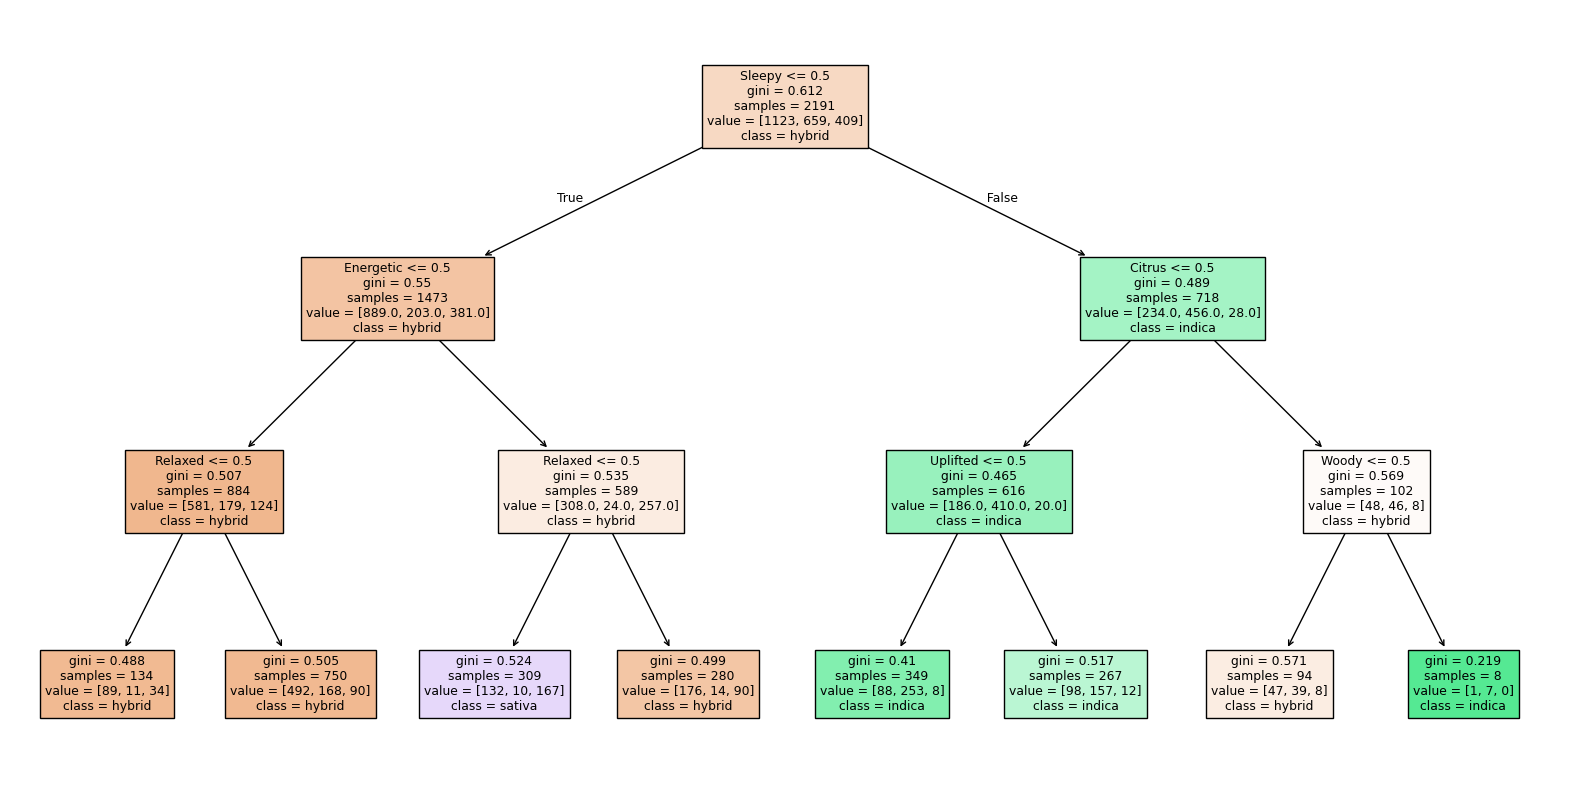

Decision Tree CV Accuracy: 0.6243897882938978
Decision Tree Confusion Matrix:
[[804 187 132]
 [232 417  10]
 [222  20 167]]


In [12]:
# Decision Tree pipeline with max depth at 3 for easier interpretation/ ability to understand for anyone seeing this
dt_pipe = Pipeline([
    ("model", DecisionTreeClassifier(
        max_depth=3
    ))
])

# Fit the decision tree on dataset
dt_pipe.fit(X, y)

# Extract the model from the pipeline
dt_model = dt_pipe.named_steps["model"]

# Plot the tree with plot_tree function that I found in Professor Ross help colab
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.show()

dt_cv = cross_val_score(dt_pipe, X, y, cv=10, scoring="accuracy")
print("Decision Tree CV Accuracy:", dt_cv.mean())

# Confusion matrix
dt_preds = dt_pipe.predict(X)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y, dt_preds))


**Decision Tree Interpretation:**

Here we see that the decision tree's initial split was made on "sleepy" showing that it is the strongest seperator of the strain types we have. Next were Energetic and then Citrus showing that these are also important predicotrs for distinguishing between Indica, sativa, and hybrid weed. The model had a 10-fold cross validaiton accurayc of .624 which is understandably lower than our binary models in part one because of the higher classification difficulty. Our confusion matrix also shows that in this case Hyrbid weed was the hardest to classify correclty based one percentage and Indica was classified most accuractely.

**LDA**

In [13]:
# Used the exact same skeleton for the LDA in part one
lda = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearDiscriminantAnalysis())
])

lda_cv = cross_val_score(lda, X, y, cv=10, scoring="accuracy")
print("LDA CV Accuracy:", lda_cv.mean())

lda.fit(X, y)

lda_preds = lda.predict(X)
print(confusion_matrix(y, lda_preds))


LDA CV Accuracy: 0.6284931506849315
[[778 203 142]
 [189 461   9]
 [205  20 184]]


**QDA**

In [14]:
# USed the same skeleton as QDA in part one
qda_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", QuadraticDiscriminantAnalysis(reg_param=.5))
])

# Grid of possible reg_param values, ran it and code output that .5 was the best value here.
# param_grid = {"model__reg_param": [0, 0.01, 0.1, 0.3, 0.5]}

# Cross-validated accuracy
qda_cv = cross_val_score(qda_pipe, X, y, cv=10, scoring="accuracy")
print("QDA CV Accuracy:", qda_cv.mean())

# Fit final QDA model to full dataset
qda_pipe.fit(X, y)

# Confusion matrix on full data
qda_preds = qda_pipe.predict(X)
print("Confusion Matrix")
print(confusion_matrix(y, qda_preds))


QDA CV Accuracy: 0.4988667496886675
Confusion Matrix
[[530 287 306]
 [ 87 509  63]
 [ 77  28 304]]


**KNN**

In [15]:
# KNN pipeline
knn_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

# Try values of k from 1 to 40
param_grid = {"model__n_neighbors": range(1, 41)}

# cross validation search with 10
knn_tune = GridSearchCV(
    knn_pipe,
    param_grid,
    cv=10,
    scoring="accuracy"
)

# fitting to model
knn_tune.fit(X, y)

print("Best k:", knn_tune.best_params_)
print("Best CV accuracy:", knn_tune.best_score_)


Best k: {'model__n_neighbors': 37}
Best CV accuracy: 0.5755334163553342


In [16]:
# KNN pipeline fit with k = 37 as I found it to be the best in the previosu code block
knn_final = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=37))
])

knn_final_cv = cross_val_score(
    knn_final, X, y, cv=10, scoring="accuracy"
)

print("Final KNN CV Accuracy:", knn_final_cv.mean())

knn_final.fit(X, y)

# Confusion matrix
knn_preds = knn_final.predict(X)
print("KNN Confusion Matrix:")
print(confusion_matrix(y, knn_preds))



Final KNN CV Accuracy: 0.5755334163553342
KNN Confusion Matrix:
[[943 153  27]
 [325 332   2]
 [356  14  39]]


**Question 3: Metrics/Interpretation**

The classification metric of accuracy that we used in both part one and two was noticeably lower in part Two for all models. However, as I mentioend earlier this is due to part one being a binary problem that only needs to seperate two groups while the third category which is Hybrid, added in part 3 means that the decision boundaries become more complex and difficult. We expect a drop in accuracy just as discussed in class, if you only have to choose from 2 you would expect to be 50% but once you have to make a deicison of 5 your likelihood of being correct drops immensely.

Across all the models, the confusion matrices showed that Hybrid strains were the most commonly classified. Hybrid was seen in all the matrices to be misclassified for Indica and Sativa causing the models to confuse it with one of the regular strain types. Indica performed better however it still had much misclassification confusion with Hybrid strands especially in the KNN and LDA models. Sativa was also the smallest class in the data, which meant the boundaries were a little weaker and it got misclassified as Hybrid a lot as well.

The reason the misclassifications occur is becasue Hyrbid strains share characterisitcs with both INdica and Sativa making it super difficult to find distinct patterns. Because there are many numbers of predictors, the usefulness of things like Euclidean distance in Knn was weakened and QDA performed the worst in this case because it tries to estimate a full covariance matrix for every class and it becomes unstable.

# Part 3: Multiclass from Binary

**OVR Models**

In [17]:
# Create OvR binary variables for indica sativa and hybrid
y_indica = (weed["Type"] == "indica").astype(int)

y_sativa = (weed["Type"] == "sativa").astype(int)

y_hybrid = (weed["Type"] == "hybrid").astype(int)



**Logistic Regresion**

In [18]:
# importing f1
from sklearn.metrics import f1_score

# making the enw pipeline
lr_ovr = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])

# finding the cross validated f1 scores
lr_indica_f1 = cross_val_score(lr_ovr, X, y_indica, cv=10, scoring="f1").mean()
lr_sativa_f1 = cross_val_score(lr_ovr, X, y_sativa, cv=10, scoring="f1").mean()
lr_hybrid_f1 = cross_val_score(lr_ovr, X, y_hybrid, cv=10, scoring="f1").mean()

#printing scores
print("Logistic Regression OvR F1 Scores:")
print("Indica vs Rest:", lr_indica_f1)
print("Sativa vs Rest:", lr_sativa_f1)
print("Hybrid vs Rest:", lr_hybrid_f1)


Logistic Regression OvR F1 Scores:
Indica vs Rest: 0.6375433234971492
Sativa vs Rest: 0.3899360020231339
Hybrid vs Rest: 0.6335624197089393


**SVC**

In [19]:
# defined the c values we are going to try, attempted to try more but couldn't run
C_values = [ 0.1, 1, 10]


In [20]:
# creating the pipeline
svc_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", SVC(kernel="linear"))
])

param_grid = {"model__C": C_values}

# searching with gridsearch for the indica OVR
svc_indica_tune = GridSearchCV(
    svc_pipe,
    param_grid,
    cv=5,
    scoring="f1"
)

# fitting the model
svc_indica_tune.fit(X, y_indica)

# outputting the best model parameter and f1 score for the best model
print("Indica vs Rest")
print("Best C:", svc_indica_tune.best_params_)
print("Best F1:", svc_indica_tune.best_score_)


Indica vs Rest
Best C: {'model__C': 0.1}
Best F1: 0.6618936442536972


In [21]:
# running grid search for the sativa OvR
svc_sativa_tune = GridSearchCV(
    svc_pipe,
    param_grid,
    cv=5,
    scoring="f1"
)
# fitting the model
svc_sativa_tune.fit(X, y_sativa)
# outputting the best model parameter and f1 score for the best model
print("Sativa vs Rest")
print("Best C:", svc_sativa_tune.best_params_)
print("Best F1:", svc_sativa_tune.best_score_)


Sativa vs Rest
Best C: {'model__C': 1}
Best F1: 0.2912345926371172


In [22]:
# running grid search for the hybrid ovR
svc_hybrid_tune = GridSearchCV(
    svc_pipe,
    param_grid,
    cv=5,
    scoring="f1"
)
# fitting the model
svc_hybrid_tune.fit(X, y_hybrid)
# outputting the best model parameter and f1 score for the best model
print("Hybrid vs Rest")
print("Best C:", svc_hybrid_tune.best_params_)
print("Best F1:", svc_hybrid_tune.best_score_)


Hybrid vs Rest
Best C: {'model__C': 0.1}
Best F1: 0.6716032762955153


**Q2 — which models performed worst/best**


Across the logistic regression and SVC, the OvR SVC model distinguishing the Hybrid vs the rest performed the best. Followed closely by the SVC model for Indica, and then the Logistic regression followed the same suit having F1 scores of around .63-.64 for both hybrid and indica meaning they were distinguished very similarly.

This makes sense because Hybrid and Indica are both larger parts of the dataset, and given that the models use the data to try to learn patterns and make boundaries of some sort the two classes that have more data are strnger and more consistent in their f1 scores.

Obviously this means the sativa vs rest OvR models performed the worst for both logistic regression and svc which is expected because sativa is the smallest class of weed making up our dataset. This makes f1's job difficult and sativa also often shares many effects as hybrid strands making it harder to identify based on the predictors.



**OvO**

In [28]:
# Columns that need to be dropped again like at the beginning
cols_to_drop = ["Type", "Strain", "Effects", "Flavor"]

# Extract cleaned class subsets and dropping na values
indica = weed[weed["Type"] == "indica"].dropna()
sativa = weed[weed["Type"] == "sativa"].dropna()
hybrid = weed[weed["Type"] == "hybrid"].dropna()

# Indica vs Sativa, used chat to remind myself of pd.concat to get the dataset joined
data_indica_sativa = pd.concat([indica, sativa])
X_ind_sat = data_indica_sativa.drop(columns=cols_to_drop)
y_ind_sat = (data_indica_sativa["Type"] == "indica").astype(int)

# Indica vs Hybrid, same process as before
data_indica_hybrid = pd.concat([indica, hybrid])
X_ind_hyb = data_indica_hybrid.drop(columns=cols_to_drop)
y_ind_hyb = (data_indica_hybrid["Type"] == "indica").astype(int)

#Hybrid vs Sativa
data_hybrid_sativa = pd.concat([hybrid, sativa])
X_hyb_sat = data_hybrid_sativa.drop(columns=cols_to_drop)
y_hyb_sat = (data_hybrid_sativa["Type"] == "hybrid").astype(int)


**Logistic Regression**

In [32]:
# importing roc_auc
from sklearn.metrics import roc_auc_score

# creating pipeline for logsitic regression again
lr_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])

# cross validated for each pair
lr_ind_sat_auc = cross_val_score(lr_pipe, X_ind_sat, y_ind_sat, cv=5, scoring="roc_auc").mean()
lr_ind_hyb_auc = cross_val_score(lr_pipe, X_ind_hyb, y_ind_hyb, cv=5, scoring="roc_auc").mean()
lr_hyb_sat_auc = cross_val_score(lr_pipe, X_hyb_sat, y_hyb_sat, cv=5, scoring="roc_auc").mean()

# printing scores
print("Logistic Regression OvO ROC-AUC:")
print("Indica vs Sativa:", lr_ind_sat_auc)
print("Indica vs Hybrid:", lr_ind_hyb_auc)
print("Hybrid vs Sativa:", lr_hyb_sat_auc)


Logistic Regression OvO ROC-AUC:
Indica vs Sativa: 0.9292102413210628
Indica vs Hybrid: 0.790464110502517
Hybrid vs Sativa: 0.7330398964263012


**SVC**

In [31]:
# creating peiplien for svc
svc_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", SVC(kernel="linear", C=0.1)) # decided to use c = .1 because that was consistently the best value for the parameter throughout
])

# cross validation for roc auc scores of svc
svc_ind_sat_auc = cross_val_score(svc_pipe, X_ind_sat, y_ind_sat, cv=5, scoring="roc_auc").mean()
svc_ind_hyb_auc = cross_val_score(svc_pipe, X_ind_hyb, y_ind_hyb, cv=5, scoring="roc_auc").mean()
svc_hyb_sat_auc = cross_val_score(svc_pipe, X_hyb_sat, y_hyb_sat, cv=5, scoring="roc_auc").mean()

# printing scores
print("SVC OvO ROC-AUC:")
print("Indica vs Sativa:", svc_ind_sat_auc)
print("Indica vs Hybrid:", svc_ind_hyb_auc)
print("Hybrid vs Sativa:", svc_hyb_sat_auc)


SVC OvO ROC-AUC:
Indica vs Sativa: 0.9324702579279629
Indica vs Hybrid: 0.7843829081665438
Hybrid vs Sativa: 0.7296008738284032


**Question 4: which performed worst/best?**

The best performing model here was the SVC for Indica vs. sativa, which had a ROC-AUC of .932. A very close second was logistic regression for the same pair at .929, and these results sgugest that a linear boundary is very effective when distinguishing between the two distinct cannabis categories of Indica and Sativa.

The weakeast performing model overall was the svc for hybrid vs. sativa which had a roc-auc of .729. The same pair again for logistic regression performed similarly which again make sense because our hybrid strains often share many effect profiles that sativa strains share potentially like energizer or uplifting which can cause heavy overlap and it makes classifcation between the two much more difficult.

**Q5:**

If I had initially input the full dataset with all three classes into the logistic regression funciton, in sci-kit learn the model would not use a OvO it would by default use the OvR strategy. From my understanding, it fits one model per classs wehre each class is compared against the other two combined. When I asked chat for further explanation it said there are things potentially like a solver like "lbfgs" which apparently in logistic regression can fit amultinomial version of the model and treat all three classes simultanesously. Most importantly though is that logsistic regression never defaults to OvO if given more than two classes.


SVC on the other hand is different as sci-kit learn automatically uses the OvO strategy whenever SVC handles multiclass data. Again from what I understood the algorithm here trains seperate classifiers for each pair fo classes in this case our three pairs would be indica v sativa, sativa v hybrid, hybrid v indica and makes final predictions through a type of voting process across the models. When I asked chat to add further detail it explained that the OvO strategy is a standard multicolass extension for SVMs and is applied regardless fo teh kernel or hyperparameters chosen.